In [2]:
%%HTML

<html>
<head>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Lateef">
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Consolas">
<style>
body {background-color: powderblue;}
s1   {font-size: 250% ;font-family: "Lateef"; direction: rtl; font-weight: bold;}
p    {font-family: "Lateef"; direction: rtl; font-size: 28px; text-align: justify;}
code {font-family: "Consolas"; direction: rtl; font-size: 16px; text-align: justify;}
ul {font-family: "Lateef"; direction: rtl; font-size: 28px; text-align: justify; line-height: 1.3}
</style>
</head>

In [1]:
from google.colab import output

In [2]:
!gdown -q --id 1yMfgyVupvnr9UzozQv0Kg-h0QTfsHwtt   # divar_test.csv
!gdown -q --id 1uZfzsjPuP7l6OYywiOpODbw4CxVdE5_e   # divar_train.csv
!gdown -q --id 1FKISvL8Qsh2qFxw0CD4cjmEDT7qxPiuP   # persian

In [3]:
!pip -q install hazm

output.clear()

In [4]:
import pandas as pd
from IPython.display import display_html
import codecs
from hazm import Normalizer, Stemmer, Lemmatizer, word_tokenize
import random

# Section 1

[link](https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side)

In [5]:
def mydisplay(dfs, names=[], index=False):
    def to_df(x):
        if isinstance(x, pd.Series):
            return pd.DataFrame(x)
        else:
            return x
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><b>{name}<b></td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {to_df(df).to_html(index=index)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [6]:
data_train = pd.read_csv("divar_train.csv")
data_test = pd.read_csv("divar_test.csv")
mydisplay([data_train[5:10], data_test[26:31]], ['Train', 'Test'])

Train Test 
 
 
 title 
 description 
 categories 
 
 
 
 
 کمدوبوفه 
 وسایل در حد نو به مشتری واقعی تخفیف میدم 
 personal 
 
 
 فروش دوچرخه 20 
 بخاطر جابجایی قصد فروش دارم وبه خریدار\nتخفیف خوبی میدم.مشتری واقعی تماس بگیرد. 
 leisure-hobbies 
 
 
 تلویزیون ال سی دی 
 تلویزیون سونی کم کار سالم 
 electronic-devices 
 
 
 فروشی 
 تلویزیون فروشی.۲۱اینچ.اسنوا 
 electronic-devices 
 
 
 چادر١٠ نفره نونونو قیمت مناسب 
 چادر ده نفره جنس خوب یه بار استفاده شده کلا\nتخفیف هم داره \n.\n.\n.\nیاعلی 
 leisure-hobbies 
 
 
 
 
 
 title 
 description 
 categories 
 
 
 
 
 111-دولفینی-فول 
 بی رنگ -کم کار-فول sx-بیمه تا1396/02/01 
 vehicles 
 
 
 عینک آفتابی 
 عینک آفتابی ١٠٠٪‏ UV Protection 
 personal 
 
 
 موتور تزیینی 
 از جنس اهن کار دست عرضه به صورت عمده و تکی 
 for-the-home 
 
 
 میز تلویزیون شیشه ایی 
 تمیز و سالم بدون خط و خش 
 for-the-home 
 
 
 سرویس چاقو خارجی 
 سرویس چاقو ژاپنی مال فدیم سالم و نو بع قیمت 60 هزار تومن بفروش میرسد. 
 for-the-home

[link](https://github.com/kharazi/persian-stopwords)

In [7]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()
stop_words = list(set([normalizer.normalize(w) for w in codecs.open('persian', encoding='utf-8').read().split('\n') if w]))
random.sample(stop_words, 5)

['منی', 'مگر آن که', 'گرفتید', 'اخیرا', 'برابر']

In [8]:
def clean_str(s):
    s = normalizer.normalize(s)
    # s = stemmer.stem(s)
    # s = lemmatizer.lemmatize(s)
    s = word_tokenize(s)
    return [w for w in s if w not in stop_words]

In [9]:
preprocessed_data_train = data_train.copy()
preprocessed_data_train[['title', 'description']] = preprocessed_data_train[['title', 'description']].applymap(lambda x: clean_str(x))
preprocessed_data_test = data_test.copy()
preprocessed_data_test[['title', 'description']] = preprocessed_data_test[['title', 'description']].applymap(lambda x: clean_str(x))
mydisplay([preprocessed_data_train[5:10], preprocessed_data_test[26:31]], ['Train', 'Test'])

Train Test 
 
 
 title 
 description 
 categories 
 
 
 
 
 [کمدوبوفه] 
 [وسایل, حد, نو, مشتری, تخفیف, میدم] 
 personal 
 
 
 [فروش, دوچرخه, ۲۰] 
 [بخاطر, جابجایی, فروش, وبه, خریدار, تخفیف, خوبی, میدم, مشتری, تماس] 
 leisure-hobbies 
 
 
 [تلویزیون, ال, سی, دی] 
 [تلویزیون, سونی, کار, سالم] 
 electronic-devices 
 
 
 [فروشی] 
 [تلویزیون, فروشی, ۲۱, اینچ, اسنوا] 
 electronic-devices 
 
 
 [چادر, ١٠, نفره, نونونو, قیمت, مناسب] 
 [چادر, نفره, جنس, تخفیف, یاعلی] 
 leisure-hobbies 
 
 
 
 
 
 title 
 description 
 categories 
 
 
 
 
 [۱۱۱, -دولفینی-فول] 
 [رنگ, -کم, کار-فول, sx-بیمه, ۱۳۹۶/۰۲/۰۱] 
 vehicles 
 
 
 [عینک, آفتابی] 
 [عینک, آفتابی, ١٠٠, ٪‏, UV, Protection] 
 personal 
 
 
 [موتور, تزیینی] 
 [جنس, اهن, کار, دست, عرضه, تکی] 
 for-the-home 
 
 
 [میز, تلویزیون, شیشه, ایی] 
 [تمیز, سالم, خط, خش] 
 for-the-home 
 
 
 [سرویس, چاقو, خارجی] 
 [سرویس, چاقو, ژاپنی, مال, فدیم, سالم, نو, بع, قیمت, ۶۰, تومن, بفروش, میرسد] 
 for-the-home

# Section 2

<p style="direction:rtl"> 
    در این قسمت بنا داریم که احتمال وقوع یک کلاس یا
    category 
    را با دانستن کلمات خاصی به دست آوریم. احتمالی که در تصویر زیر با 
    $P(c|x)$ 
    نشان داده شده است. برای پیدا کردن این مقدار ابتدا باید
    likelihood 
    کلماتی که داخل آن کتگوری هستند را به دست بیاوریم. سپس این مقدار را در احتمال پیش‌فرض
    (prior probability) 
    ضرب کنیم. 


</p>

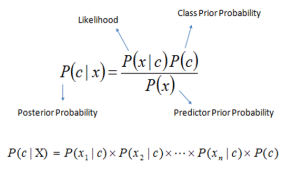

<p style="direction:rtl">
    در این جا احتمال پیش‌فرض درواقع احتمال برخورد با کلمات خاصی است. به همین ترتیب 
    $P(c)$ 
    نیز احتمال برخورد با یک کتگوری مشخص مثل 
    $c$ 
    است و 
    $P(x)$ 
    نیز احتمال برخورد با کلمه‌ای مثل 
    $x$
    . با توجه به این که ۶ کتگوری مختلف داریم، می‌توانیم فرض کنیم که به ازای هر کتگوری مثل
    $c$ 
    مقدار 
    $P(c) = \frac{1}{6}$. 
    
</p>

In [10]:
CATEGORIES = ["vehicles", "electronic-devices", "businesses", "for-the-home", "personal", "leisure-hobbies"]

In [11]:
joined_data_train = preprocessed_data_train.copy()
joined_data_train['data'] = preprocessed_data_train['title'] + preprocessed_data_train['description']
joined_data_train.drop(['title', 'description'], axis=1, inplace=True)
joined_data_train = joined_data_train[['data', 'categories']]

joined_data_test = preprocessed_data_test.copy()
joined_data_test['data'] = preprocessed_data_test['title'] + preprocessed_data_test['description']
joined_data_test.drop(['title', 'description'], axis=1, inplace=True)
joined_data_test = joined_data_test[['data', 'categories']]

mydisplay([joined_data_train[5:10], joined_data_test[26:31]], ['Train', 'Test'])

Train,Test
data,categories
"[کمدوبوفه, وسایل, حد, نو, مشتری, تخفیف, میدم]",personal
"[فروش, دوچرخه, ۲۰, بخاطر, جابجایی, فروش, وبه, خریدار, تخفیف, خوبی, میدم, مشتری, تماس]",leisure-hobbies
"[تلویزیون, ال, سی, دی, تلویزیون, سونی, کار, سالم]",electronic-devices
"[فروشی, تلویزیون, فروشی, ۲۱, اینچ, اسنوا]",electronic-devices
"[چادر, ١٠, نفره, نونونو, قیمت, مناسب, چادر, نفره, جنس, تخفیف, یاعلی]",leisure-hobbies
data,categories
"[۱۱۱, -دولفینی-فول, رنگ, -کم, کار-فول, sx-بیمه, ۱۳۹۶/۰۲/۰۱]",vehicles
"[عینک, آفتابی, عینک, آفتابی, ١٠٠, ٪‏, UV, Protection]",personal
"[موتور, تزیینی, جنس, اهن, کار, دست, عرضه, تکی]",for-the-home


<p style="direction:rtl">
    با توجه به داده‌های پایین یک‌سری نتیجه گیری داریم از جمله این که:
    دسته‌بندی خودرو ۲۶۴۹۲ کلمه دارد. با توجه به مقادیر زیر می‌توان مشاهده کرد که توزیع مقادیر درمورد تعداد کلمات هر
    دسته به صورت نرمال است. تا این‌جای کار ما مدل خود را آموزش داده‌ایم و از این‌جا به بعد سراغ دیتاست 
    train 
    می‌رویم تا با استفاده از متد 
    naive bayes 
    که پیش از این درمورد آن توضیح دادیم، مقادیر مربوط به دیتاست را به دست بیاوریم.
    
</p>

In [12]:
category_size = {category: 0 for category in CATEGORIES}
for category in CATEGORIES:
    category_size[category] = sum(joined_data_train[joined_data_train['categories'] == category]['data'].str.len())
category_size

{'businesses': 24037,
 'electronic-devices': 27856,
 'for-the-home': 19614,
 'leisure-hobbies': 24753,
 'personal': 21707,
 'vehicles': 26492}

In [13]:
category_dict = {category: dict() for category in CATEGORIES}
for category in CATEGORIES:
    for words in joined_data_train[joined_data_train['categories'] == category]['data']:
        for word in words:
            if word in category_dict[category]:
                category_dict[category][word] += 1
            else:
                category_dict[category][word] = 1
category_dict['leisure-hobbies']['فروش']

292

In [14]:
import math

tp = {category: 0 for category in CATEGORIES}
fp = {category: 0 for category in CATEGORIES}
fn = {category: 0 for category in CATEGORIES}

correct_count = 0
for index, row in joined_data_test.iterrows():
    probs = {category: 0 for category in CATEGORIES}
    for category in CATEGORIES:
        for word in row['data']:
            if word in category_dict[category]:
                # probs[category] *= (category_dict[category][word] / category_size[category])
                probs[category] += (math.log(category_dict[category][word]) - math.log(category_size[category]))
    
    pred_category = sorted(probs.items(), key= lambda x: x[1], reverse=True)[0][0]
    true_category = row['categories']
    if pred_category == true_category:
        tp[true_category] += 1
        correct_count += 1
    else:
        fp[pred_category] += 1
        fn[true_category] += 1
print(f"Number of correct answers: {correct_count}")
print(f"Total number of test data: {len(list(joined_data_test.iterrows()))}")
accuracy = correct_count / len(list(joined_data_test.iterrows()))
print(f"Accuracy: {accuracy}")

Number of correct answers: 40
Total number of test data: 1800
Accuracy: 0.022222222222222223


# Section 3

<p style="direction:rtl">
    در این‌جا خوب است که از متد 
    n-grams 
    استفاده کنیم. این روش به ما کمک می‌کند که کلمات را به صورت دقیق‌تری تعریف کنیم. به عنوان مثال کلمه‌ای مثل
    «در ماشین» 
    را در نظر بگیرید. درصورتی که از 
    n-grams 
    استفاده نکنیم، کلمه در به عنوان یک کلمه که باید حذف شود شناسایی شده و عملاً 
    عبارت «در ماشین» به آن معنای درستش در ساختار یادگیری ما ظاهر نمی‌شود. (البته باید توجه داشت که در این
    مثال خاص ما از 
    bigram 
    استفاده می‌کنیم). با استفاده از 
    bigram 
    و در حالت کلی 
    n-gram 
    می‌توان از رخ دادن اتفاقات نامطلوب این‌چنینی پیشگیری کرد.

</p>

# Section 4

<p style="direction:rtl">
    پیش از بررسی این قسمت دو فرمول زیر که در محاسبات ما استفاده شده‌اند را در نظر بگیرید.

</p>

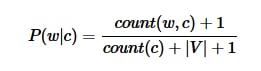

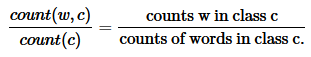

<p style="direction:rtl">
    در فرمولی که در قسمت دوم بررسی کردیم، ما کسر 
    $\frac{P(c)}{P(x)}$ 
    را در مقدار 
    $P(x|c)$ 
    ضرب می‌کنیم. این عملیات باعث می‌شود در حالت‌هایی که کلمه 
    $x$ 
    در فایل آموزش ابتدایی نیست، مقدار نهایی برابر با صفر بشود. برای جلوگیری از وقوع چنین چیزی
    از روش 
    additive smoothing 
    استفاده می‌کنیم. این کار باعث می‌شود که 
    bias 
    بیهوده‌ای که در رابطه با کلمات خاصی داشتیم، از بین برود. برای چنین کلماتی از فرمول بالا استفاده می‌کنیم.


</p>

# Section 5

In [15]:
import math

tp_additive = {category: 0 for category in CATEGORIES}
fp_additive = {category: 0 for category in CATEGORIES}
fn_additive = {category: 0 for category in CATEGORIES}
false_answers = list()

correct_count_additive = 0
for index, row in joined_data_test.iterrows():
    probs = {category: 0 for category in CATEGORIES}
    for category in CATEGORIES:
        for word in row['data']:
            if word in category_dict[category]:
                probs[category] += (math.log(1+category_dict[category][word]) - math.log(1+category_size[category]))
            else:
                probs[category] += (math.log(1) - math.log(1+len(category_dict[category])+category_size[category]))
    
    pred_category = sorted(probs.items(), key= lambda x: x[1], reverse=True)[0][0]
    true_category = row['categories']
    if pred_category == true_category:
        tp_additive[true_category] += 1
        correct_count_additive += 1
    else:
        fp_additive[pred_category] += 1
        fn_additive[true_category] += 1
        false_answers.append({
            'idx': index,
            'true_category': true_category,
            'pred_category': pred_category
        })
print(f"Number of correct answers: {correct_count_additive}")
print(f"Total number of test data: {len(list(joined_data_test.iterrows()))}")
accuracy_additive = correct_count_additive / len(list(joined_data_test.iterrows()))
print(f"Accuracy: {accuracy_additive}")

Number of correct answers: 1554
Total number of test data: 1800
Accuracy: 0.8633333333333333


<p style="direction:rtl">
    با بررسی نتایج بالا می‌توان مشاهده کرد وقتی که از متد 
    additive smoothing 
    استفاده می‌کنیم دقت راه‌حل به‌دست آمده چقدر بیشتر خواهد شد! این اتفاق از این جهت می‌افتد که توانسته‌ایم 
    حالت‌هایی که در آن‌ها در دیتاست تست با کلمات جدید روبرو شده‌ایم را به خوبی مدیریت کنیم.

</p>

# Section 6

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

sn.set_style("darkgrid")

In [17]:
def plot_bars():
    f, ax = plt.subplots(2, 3, figsize=(24,9),
                            gridspec_kw={'wspace':0.1, 'hspace':0.4}, 
                            squeeze=True)
    
    f.suptitle(f'Most Frequent Words', fontweight ='bold')
    f.subplots_adjust(top=0.9)

    for n, category in enumerate(CATEGORIES):
        i = n // ax.shape[1]
        j = n % ax.shape[1]

        dictionary = category_dict[category]
        dictionary_length = 6
        sorted_dict_values = sorted(dictionary.values(), reverse=True)[:6]
        sorted_dict_keys = sorted(dictionary, key=dictionary.get, reverse=True)[:6]

        X = np.arange(dictionary_length)
        for k in range(0, dictionary_length):
            ax[i, j].bar(sorted_dict_keys[k], sorted_dict_values[k], align='center',width=0.5)

        plt.sca(ax[i, j])
        ax[i, j].set_xticks(X)
        xtickNames = ax[i, j].set_xticklabels(sorted_dict_keys)
        plt.xticks(rotation=90)

        ax[i, j].set_title(category)

    plt.show()

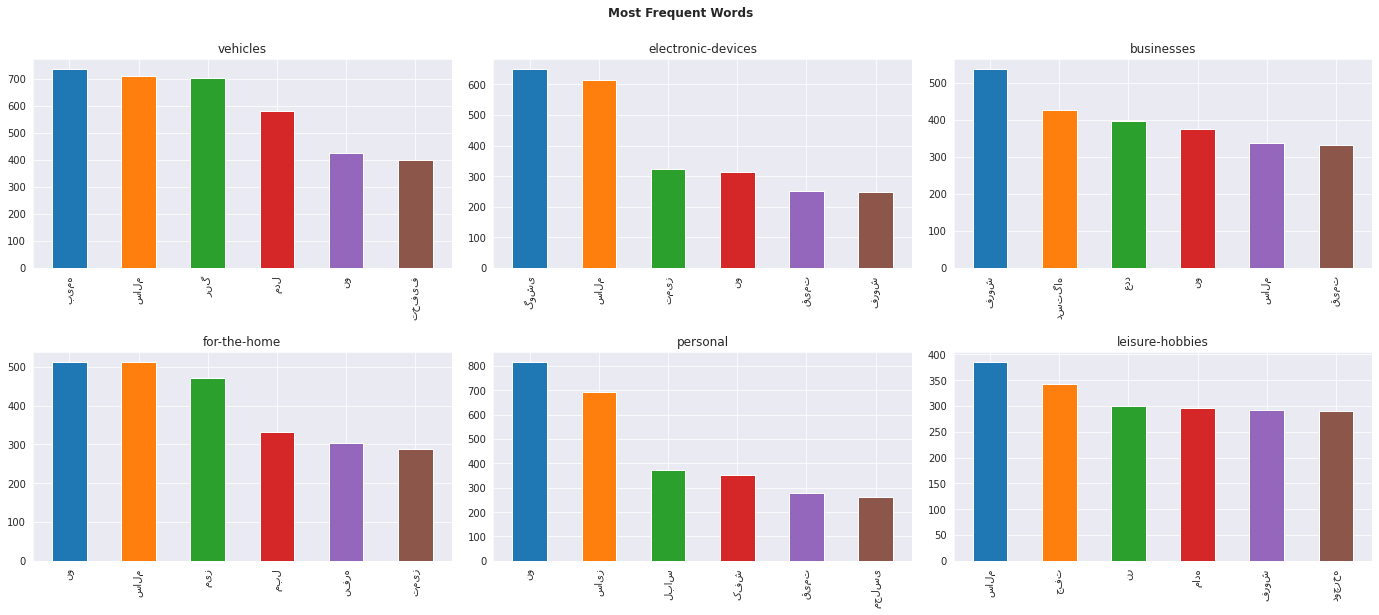

In [18]:
plot_bars()

# Section 7

<p style="direction:rtl">
    
قبل از بررسی قسمت‌های بعدی، فرمول‌های زیر را برای 
    attributeهای
    گفته شده در نظر بگیرید.

</p>

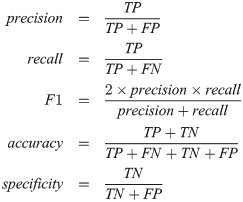

<p style="direction:rtl">
    حالتی را در نظر بگیرید که 
    classifier 
    ما همیشه تنها یک کلاس خاص مثل 
    personal 
    را به عنوان جواب انتخاب کند.
    در چنین حالتی مقدار 
    Recall 
    برای این کلاس برابر با ۱۰۰ درصد خواهد بود. این به این معنی است که بایاس خیلی زیادی داریم. از طرف دیگر 
    اگر 
    تعداد prediction
    مدل ما به اندازه کافی نباشد، جواب‌های خطای معقولی نخواهیم داشت.
    این به این معنی است که دقت یا به عبارت دیگر مقدار 
    Precision 
    در ابتدای کار بسیار زیاد خواهد شد.
</p>

# Section 8

<p style="direction:rtl">
    با توجه به فرمول‌های بالا مقدار 
    F1 
    برابر با میانگین 
    Recall و Precision است.
    به این ترتیب اگر بخواهیم 
    Precision را
    بهتر کنیم، در این صورت مقدار 
    Recall 
    کم می‌شود (با فرض این که مقدار 
    F1 
    ثابت باشد).
    از طرف دیگر اگر بخواهیم مقدار 
    F1 را
    افزایش دهیم هر دو مقدار 
    Recall و Precision 
    باید افزایش پیدا کنند. به این ترتیب اگر بخواهیم مدلی داشته باشیم که مقدار این دو ویژگی در آن‌ها در حالت
    بهینه باشد، اولاً باید هر دو بیشترین مقدار ممکن را داشته باشند و ثانیاً این که تفاوت بین آن‌ها نیز زیاد نباشد. 
    هر دو این ویژگی‌ها ما را به سمت بیشتر کردن مقدار 
    F1 
    می‌برد. 


</p>

# Section 9

<p style="direction:rtl">
    با توجه به خواسته دستور کار تعاریف خواسته شده به صورت زیر هستند:
</p>

<p style="direction:rtl">
    اول Macro-F1 را بررسی می‌کنیم: 
    میانگین حسابی تمام مقادیر F1
    برای کتگوری‌های مختلف است. بدون این که سایز یا تعداد اعضای هر کلاس را در نظر بگیریم.
</p>

<p style="direction:rtl">
    مقدار Weighted-F1 
    در واقع مجموع وزن‌دار تمامی مقادیر F1 
    برای کلاس‌های مختلف است. وزن هر جمعوند با توجه به تعداد اعضای کلاس مربوط به کلاس متناظر آن مشخص می‌شود.
</p>

<p style="direction:rtl">
    در نهایت مقدار 
    Micro-F1 نیز
    حاصل جمعی از میانگین میکروی مقادیر Precision 
    و میانگین میکروی Recall 
    در هر کلاس است. به ازای تمام 
    instanceها 
    باید تعداد 
    FPها را برای 
    Precision و
    تعداد FNها
     را برای Recall 
    حساب کنیم. می‌توان این‌طور نتیجه‌گیری کرد که:
    micro-F1 = micro-precision = micro-recall
</p>

# Section 10

<h2>Without Additive Smoothing</h2>

In [19]:
tps, fps, fns = list(), list(), list()
precisions = list()
recalls = list()
f1s = list()
for category in CATEGORIES:
    tps.append(tp[category])
    fps.append(fp[category])
    fns.append(fn[category])

    precision = tps[-1] / (tps[-1] + fps[-1])
    precisions.append(precision)

    recall = tps[-1] / (tps[-1] + fns[-1])
    recalls.append(recall)

    f1 = (2 * precision * recall) / (precision + recall)
    f1s.append(f1)
    
display(
pd.DataFrame({
    'Category': CATEGORIES,
    'True Positive': tps,
    'False Positive': fps,
    'False Negative': fns,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s
}))
print()
prec = sum(tps) / (sum(tps) + sum(fps))
reca = sum(tps) / (sum(tps) + sum(fns))
display(
pd.DataFrame({
    'Macro Avg': [sum(f1s) / len(CATEGORIES)],
    'Micro Avg': [2 * prec * reca / (prec + reca)],
    'Weighted Avg': [sum(np.array(f1s) * np.array(list(category_size.values()))) / sum(list(category_size.values()))]
}))

,Category,True Positive,False Positive,False Negative,Precision,Recall,F1
0,vehicles,4,433,296,0.009153,0.013333,0.010855
1,electronic-devices,7,344,293,0.019943,0.023333,0.021505
2,businesses,8,112,292,0.066667,0.026667,0.038095
3,for-the-home,9,402,291,0.021898,0.030000,0.025316
4,personal,7,332,293,0.020649,0.023333,0.021909
5,leisure-hobbies,5,137,295,0.035211,0.016667,0.022624


,Macro Avg,Micro Avg,Weighted Avg
0,0.023384,0.022222,0.023083


<h2>With Additive Smoothing</h2>

In [20]:
tps_additive, fps_additive, fns_additive = list(), list(), list()
precisions_additive = list()
recalls_additive = list()
f1s_additive = list()
for category in CATEGORIES:
    tps_additive.append(tp_additive[category])
    fps_additive.append(fp_additive[category])
    fns_additive.append(fn_additive[category])

    precision_additive = tps_additive[-1] / (tps_additive[-1] + fps_additive[-1])
    precisions_additive.append(precision_additive)

    recall_additive = tps_additive[-1] / (tps_additive[-1] + fns_additive[-1])
    recalls_additive.append(recall_additive)

    f1_additive = (2 * precision_additive * recall_additive) / (precision_additive + recall_additive)
    f1s_additive.append(f1_additive)
    
display(
pd.DataFrame({
    'Category': CATEGORIES,
    'True Positive': tps_additive,
    'False Positive': fps_additive,
    'False Negative': fns_additive,
    'Precision': precisions_additive,
    'Recall': recalls_additive,
    'F1': f1s_additive
}))
print()
prec_additive = sum(tps_additive) / (sum(tps_additive) + sum(fps_additive))
reca_additive = sum(tps_additive) / (sum(tps_additive) + sum(fns_additive))
display(
pd.DataFrame({
    'Macro Avg': [sum(f1s_additive) / len(CATEGORIES)],
    'Micro Avg': [2 * prec_additive * reca_additive / (prec_additive + reca_additive)],
    'Weighted Avg': [sum(np.array(f1s_additive) * np.array(list(category_size.values()))) / sum(list(category_size.values()))]
}))

,Category,True Positive,False Positive,False Negative,Precision,Recall,F1
0,vehicles,275,18,25,0.938567,0.916667,0.927487
1,electronic-devices,268,19,32,0.933798,0.893333,0.913118
2,businesses,230,65,70,0.779661,0.766667,0.773109
3,for-the-home,266,83,34,0.762178,0.886667,0.819723
4,personal,267,49,33,0.844937,0.890000,0.866883
5,leisure-hobbies,248,12,52,0.953846,0.826667,0.885714


,Macro Avg,Micro Avg,Weighted Avg
0,0.864339,0.863333,0.868133


# Section 12

In [21]:
indices = list()
true_cats = list()
pred_cats = list()
for false_answer in random.sample(false_answers, 5):
    indices.append(false_answer['idx'])
    true_cats.append(false_answer['true_category'])
    pred_cats.append(false_answer['pred_category'])

display(
pd.DataFrame({
    'Row Index': indices,
    'True Category': true_cats,
    'Predicted Category': pred_cats
}))

,Row Index,True Category,Predicted Category
0,1155,vehicles,electronic-devices
1,1591,businesses,personal
2,195,leisure-hobbies,vehicles
3,580,for-the-home,businesses
4,1505,leisure-hobbies,personal


In [27]:
display(pd.DataFrame(data_test.iloc[1155]).T)

,title,description,categories
1155,jvc تصویری ضبط جی وی سی,تمام حرفهای ١٠ اکولایزر ١٠ خروجی بلندگو تمامی...,vehicles


In [30]:
display(pd.DataFrame(data_test.iloc[580]).T)

,title,description,categories
580,شىریى خورى دو طبقه,شىرینى خورى دوطبقه دور طلایى .قىمت 30000تومان,for-the-home
